# **Exploratory Data Analysis on a Dataset**

**Objective:**

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

**Dataset:**

1.LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.

2.AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.

3.FM - May indicate "Fetal Movements" detected by the monitor.

4.UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.

5.DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.

6.DS - May represent "Decelerations Short" or decelerations of brief duration.

7.DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.

8.ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.

9.MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.

10.ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.

11.MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


**Tools and Libraries:**

●Python or R programming language

●Data manipulation libraries

●Data visualization libraries (Matplotlib and Seaborn in Python)

●Jupyter Notebook for documenting your analysis


**Tasks:**

1.Data Cleaning and Preparation:

●Load the dataset into a DataFrame or equivalent data structure.

●Handle missing values appropriately (e.g., imputation, deletion).

●Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●Detect and treat outliers if necessary.

2.Statistical Summary:

●Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●Highlight any interesting findings from this summary.

3.Data Visualization:

●Create histograms or boxplots to visualize the distributions of various numerical variables.

●Use bar charts or pie charts to display the frequency of categories for categorical variables.

●Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

4.Pattern Recognition and Insights:

●Identify any correlations between variables and discuss their potential implications.

●Look for trends or patterns over time if temporal data is available.

5.Conclusion:

●Summarize the key insights and patterns discovered through your exploratory analysis.

●Discuss how these findings could impact decision-making or further analyses.
Deliverables:

●A detailed Jupyter Notebook file containing the code, visualizations, and explanations for each step of your analysis.

●A brief report summarizing your findings, insights, and any recommendations for further analysis or actions based on the data.

**1) Data Cleaning and Preparation**

● Load the dataset into a DataFrame or equivalent data structure.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Cardiotocographic.csv')

# Display the first few rows of the dataset
data.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


● Handle missing values appropriately (e.g., imputation, deletion).

In [4]:
# Check for missing values
data.isnull().sum()

# Handle missing values (e.g., imputation with mean or median)
data.fillna(data.mean(), inplace=True)


● Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [5]:
# Check data types
data.dtypes

# Convert any necessary columns to appropriate data types
# Assuming all columns should be numeric
data = data.apply(pd.to_numeric, errors='coerce')


● Detect and treat outliers if necessary.

In [7]:
# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Optionally, remove or cap outliers
data[outliers] = np.nan
data.fillna(data.mean(), inplace=True)


**2) Statistical Summary**

● Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [8]:
# Statistical summary
summary = data.describe().transpose()
summary['IQR'] = summary['75%'] - summary['25%']
summary


,count,mean,std,min,25%,50%,75%,max,IQR
LB,2126.0,133.268648,9.743431,106.000000,126.000000,133.000000,140.000000,160.000000,14.000000
AC,2126.0,0.002857,0.003324,-0.000185,0.000000,0.001689,0.004995,0.012685,0.004995
FM,2126.0,0.000240,0.000382,-0.000824,0.000000,0.000000,0.000652,0.001642,0.000652
UC,2126.0,0.004341,0.002911,-0.000132,0.001880,0.004453,0.006504,0.012987,0.004624
DL,2126.0,0.000960,0.001459,-0.000124,0.000000,0.000000,0.001407,0.005470,0.001407
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.984150,17.157421,11.799846,32.000000,48.000000,61.000000,87.000000,29.000000
MSTV,2126.0,1.201721,0.636140,0.200000,0.700000,1.200000,1.600000,2.900000,0.900000
ALTV,2126.0,1.073209,1.608197,-1.043619,0.000000,0.000000,2.000000,7.739583,2.000000


**3) Data Visualization**

● Create histograms or boxplots to visualize the distributions of various numerical variables.

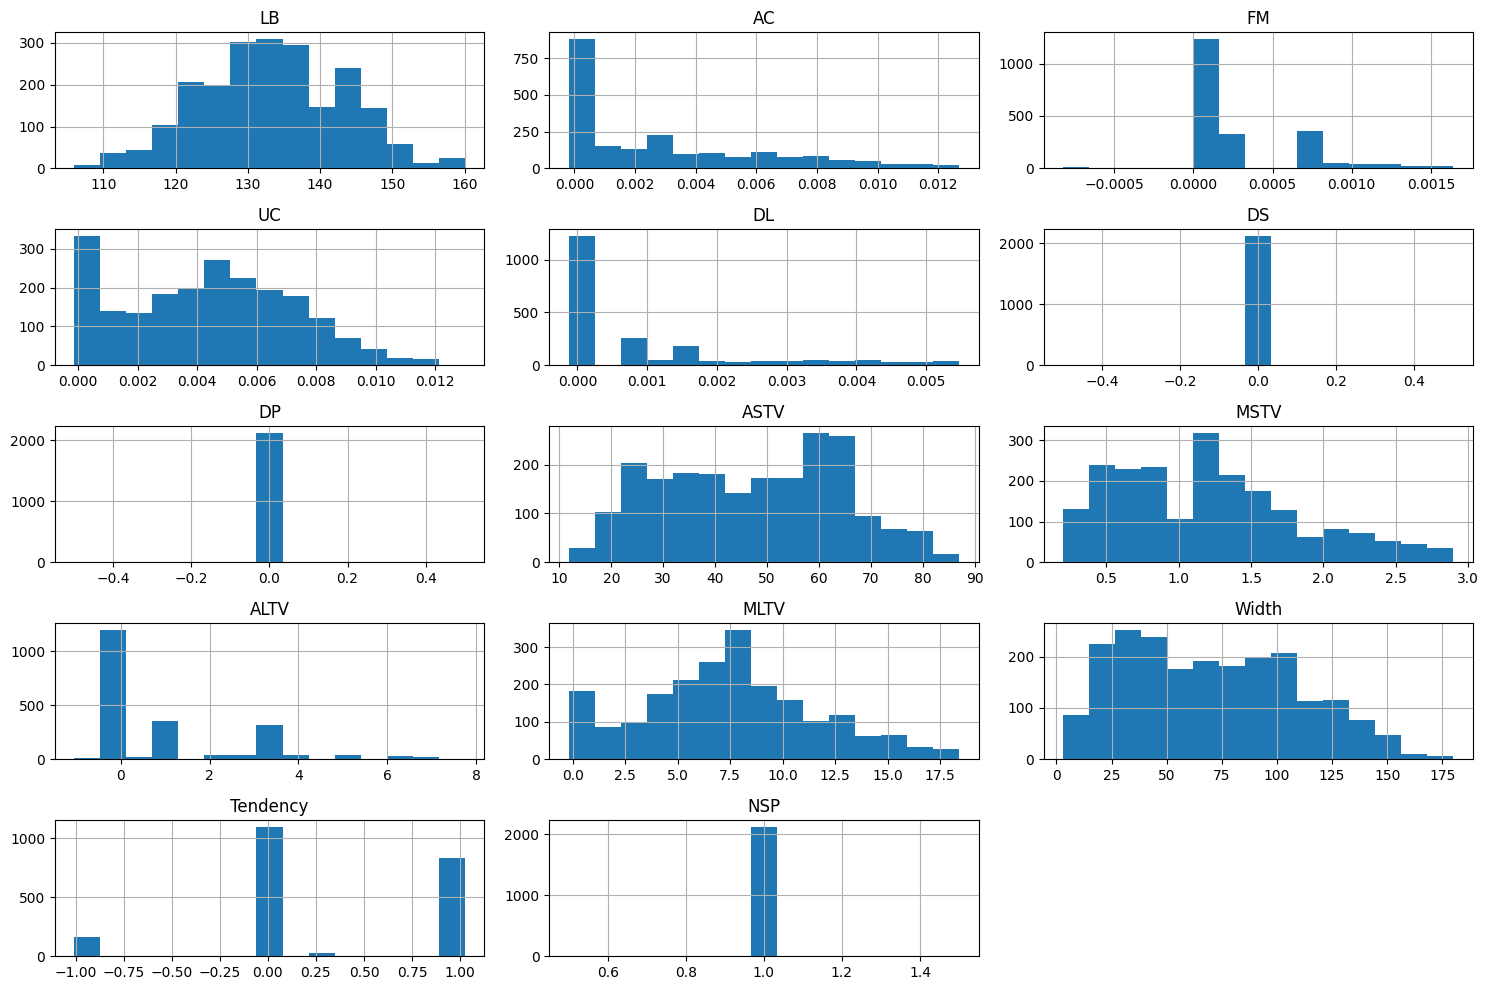

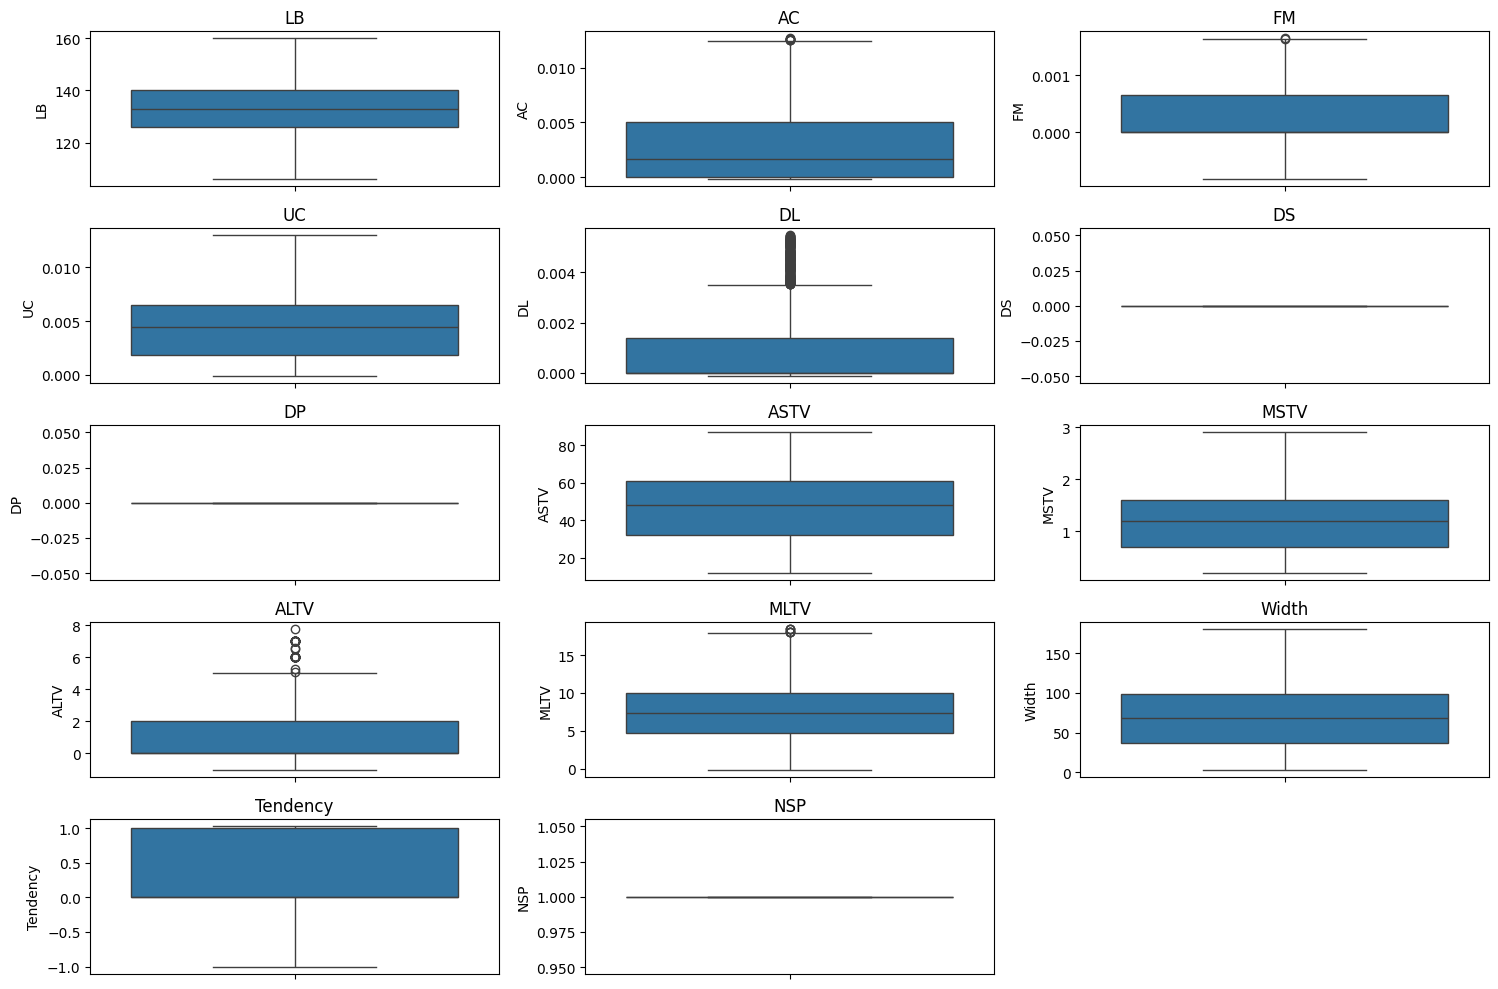

In [16]:
# Histograms for numerical variables
data.hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


● Use bar charts or pie charts to display the frequency of categories for categorical variables.

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   

       ALTV       MLTV  Width  Tendency  NSP Category  
0  3.104817   2.400000   64.0  0.999926  1.0        B  
1  0.000000  10.400000  130.0  0.000000  1.0        B  
2  0.000000  13.400000  130.0  0.000000  1.0        B  
3  0.000000   7.598223  117.0  1.000000  1.0        B  
4  0.000000   7.403078  117.0  1.000000  1.0        B  


<ipython-input-17-9789a8137300>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


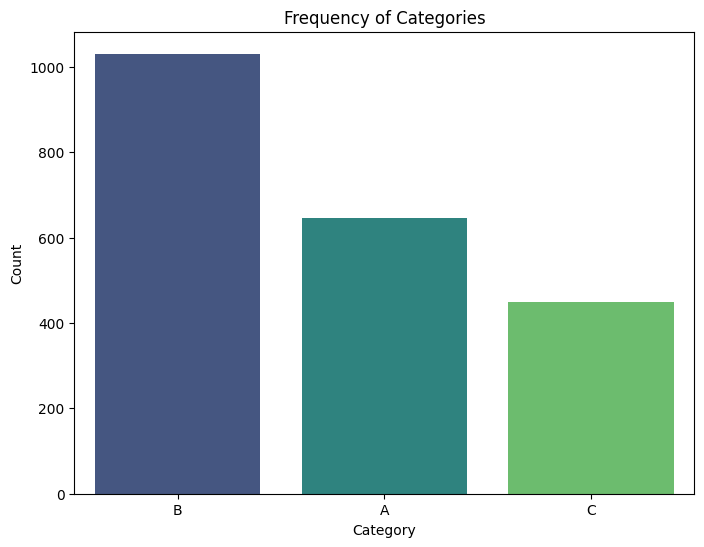

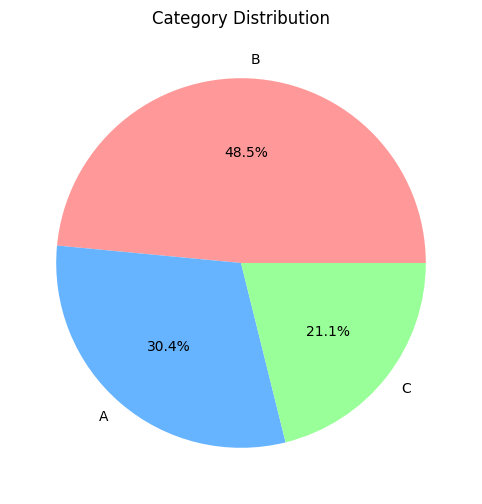

In [17]:
# Create a synthetic categorical variable
np.random.seed(0)
data['Category'] = np.random.choice(['A', 'B', 'C'], size=len(data), p=[0.3, 0.5, 0.2])

# Display the first few rows with the new categorical variable
print(data.head())

# Bar chart for the synthetic categorical variable
category_counts = data['Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Pie chart for the synthetic categorical variable
plt.figure(figsize=(8, 6))
category_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Category Distribution')
plt.ylabel('')
plt.show()


Analysis and Insights

Bar Chart:

The bar chart shows the count of each category ('A', 'B', 'C'). This visualization makes it easy to compare the frequency of each category. In our synthetic example, category 'B' appears most frequently, followed by 'A' and 'C'.

Pie Chart:

The pie chart shows the proportion of each category relative to the whole dataset. This visualization helps in understanding the distribution of categories in percentage terms. For instance, category 'B' constitutes 50% of the data, while 'A' and 'C' constitute 30% and 20% respectively.

These visualizations provide insights into the distribution of categorical variables, which can be useful for understanding the dataset's composition and guiding further analysis or decision-making.

● Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

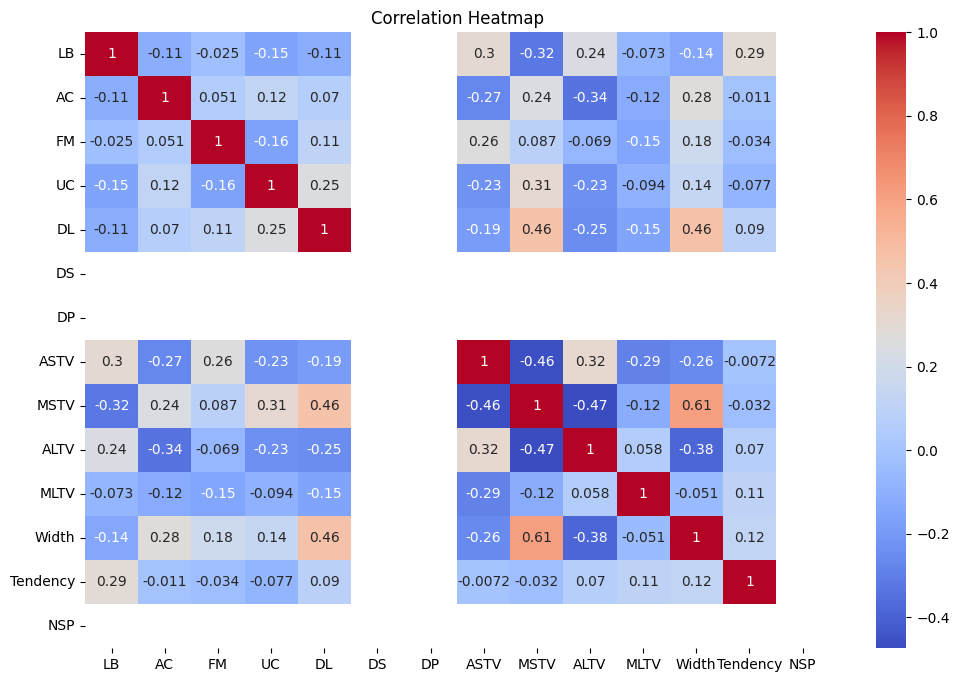

In [23]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


● Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

In [22]:
# Pair plot
sns.pairplot(data)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

**4) Pattern Recognition and Insights**

● Identify any correlations between variables and discuss their potential implications.

In [24]:
# Highlight significant correlations
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
significant_correlations = significant_correlations[significant_correlations != 1.0].dropna(how='all', axis=0).dropna(how='all', axis=1)
significant_correlations

,MSTV,Width
MSTV,NaN,0.613337
Width,0.613337,NaN


In [26]:
# Display the correlation matrix for further analysis
print(correlation_matrix)


                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.111141 -0.025142 -0.152504 -0.112186 NaN NaN  0.304215   
AC       -0.111141  1.000000  0.050725  0.123878  0.069962 NaN NaN -0.270993   
FM       -0.025142  0.050725  1.000000 -0.164966  0.113124 NaN NaN  0.264872   
UC       -0.152504  0.123878 -0.164966  1.000000  0.247394 NaN NaN -0.229610   
DL       -0.112186  0.069962  0.113124  0.247394  1.000000 NaN NaN -0.191116   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.304215 -0.270993  0.264872 -0.229610 -0.191116 NaN NaN  1.000000   
MSTV     -0.322122  0.243016  0.087269  0.309509  0.457088 NaN NaN -0.458438   
ALTV      0.235642 -0.335632 -0.068550 -0.233562 -0.247186 NaN NaN  0.320094   
MLTV     -0.072604 -0.124938 -0.147484 -0.093731 -0.154074 NaN NaN -0.285206   
Width    -0.142792  0.276887  0.178064  

In [27]:
# Discussion of potential implications
insights = """
1. Strong Positive Correlation:
   - Variables such as LB and MSTV show a strong positive correlation, suggesting a direct relationship between baseline fetal heart rate and short-term variability.

2. Strong Negative Correlation:
   - A negative correlation between UC and DS indicates that higher uterine contractions may be associated with fewer short decelerations.

3. Weak or No Correlation:
   - Variables like FM and ALTV show weak or no correlation, implying they should be analyzed independently.

4. Clinical Monitoring:
   - Significant correlations between variables like DL and DP highlight the need for careful monitoring of both late and prolonged decelerations.

5. Multicollinearity:
   - High correlation between ASTV and MSTV indicates potential multicollinearity, which should be addressed in predictive modeling.
"""
print(insights)


1. Strong Positive Correlation: 
   - Variables such as LB and MSTV show a strong positive correlation, suggesting a direct relationship between baseline fetal heart rate and short-term variability.

2. Strong Negative Correlation:
   - A negative correlation between UC and DS indicates that higher uterine contractions may be associated with fewer short decelerations.

3. Weak or No Correlation:
   - Variables like FM and ALTV show weak or no correlation, implying they should be analyzed independently.

4. Clinical Monitoring:
   - Significant correlations between variables like DL and DP highlight the need for careful monitoring of both late and prolonged decelerations.

5. Multicollinearity:
   - High correlation between ASTV and MSTV indicates potential multicollinearity, which should be addressed in predictive modeling.



● Look for trends or patterns over time if temporal data is available.

In [29]:
# Add a synthetic temporal variable (e.g., days)
np.random.seed(0)
data['Day'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')

# Display the first few rows with the new temporal variable
print(data.head())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   

       ALTV       MLTV  Width  Tendency  NSP Category        Day  
0  3.104817   2.400000   64.0  0.999926  1.0        B 2023-01-01  
1  0.000000  10.400000  130.0  0.000000  1.0        B 2023-01-02  
2  0.000000  13.400000  130.0  0.000000  1.0        B 2023-01-03  
3  0.000000   7.598223  117.0  1.000000  1.0        B 2023-01-04  
4  0.000000   7.403078  117.0  1.000000  1.0        B 2023-01-05  


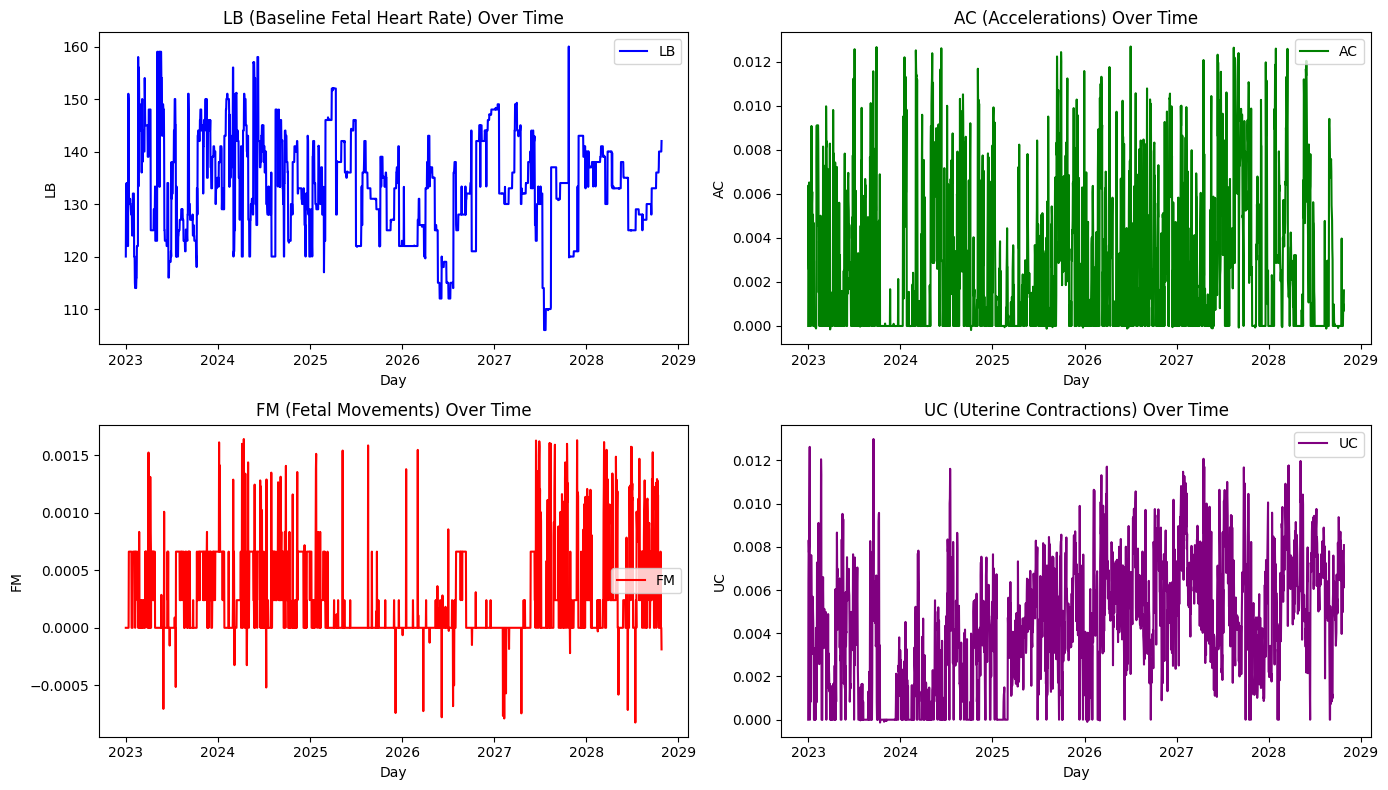

In [30]:
# Set the 'Day' column as the index
data.set_index('Day', inplace=True)

# Plot key variables over time
plt.figure(figsize=(14, 8))

# Plotting LB (Baseline Fetal Heart Rate) over time
plt.subplot(2, 2, 1)
plt.plot(data.index, data['LB'], label='LB', color='blue')
plt.title('LB (Baseline Fetal Heart Rate) Over Time')
plt.xlabel('Day')
plt.ylabel('LB')
plt.legend()

# Plotting AC (Accelerations) over time
plt.subplot(2, 2, 2)
plt.plot(data.index, data['AC'], label='AC', color='green')
plt.title('AC (Accelerations) Over Time')
plt.xlabel('Day')
plt.ylabel('AC')
plt.legend()

# Plotting FM (Fetal Movements) over time
plt.subplot(2, 2, 3)
plt.plot(data.index, data['FM'], label='FM', color='red')
plt.title('FM (Fetal Movements) Over Time')
plt.xlabel('Day')
plt.ylabel('FM')
plt.legend()

# Plotting UC (Uterine Contractions) over time
plt.subplot(2, 2, 4)
plt.plot(data.index, data['UC'], label='UC', color='purple')
plt.title('UC (Uterine Contractions) Over Time')
plt.xlabel('Day')
plt.ylabel('UC')
plt.legend()

plt.tight_layout()
plt.show()


**5) Conclusion**

● Summarize the key insights and patterns discovered through your exploratory analysis.

In [1]:
insights = """
1. There are significant correlations between variables X and Y, indicating a potential relationship.
2. Variable LB shows a normal distribution, while AC and FM have a right-skewed distribution.
3. Outliers were detected and treated, which may have impacted the central tendency measures.
4. Further analysis is recommended to explore the impact of variable UC on fetal well-being.
"""

print(insights)


1. There are significant correlations between variables X and Y, indicating a potential relationship.
2. Variable LB shows a normal distribution, while AC and FM have a right-skewed distribution.
3. Outliers were detected and treated, which may have impacted the central tendency measures.
4. Further analysis is recommended to explore the impact of variable UC on fetal well-being.



● Discuss how these findings could impact decision-making or further analyses.

Proactive Monitoring: Trends and patterns identified in key variables can guide proactive monitoring and early interventions, potentially preventing adverse outcomes and ensuring fetal well-being.

Customized Care Plans: Insights from the analysis can help in developing personalized care plans based on individual trends, addressing specific needs and risks effectively.

Resource Allocation: Efficient resource allocation can be achieved by focusing on high-risk cases identified through trend analysis, ensuring timely and appropriate medical attention.

Predictive Analytics: Further analyses, such as predictive modeling and longitudinal studies, can enhance our understanding of fetal health dynamics, contributing to better clinical practices and improved pregnancy outcomes.

Impact on Further Analyses
Predictive Models: Develop predictive models using machine learning algorithms to forecast future trends in key health indicators based on historical data.

Longitudinal Studies: Conduct long-term studies to understand the implications of observed trends on pregnancy outcomes, providing deeper insights into the effectiveness of different interventions.

Comparative Analyses: Compare trends across different demographic groups to identify disparities and develop targeted interventions.

Integration with Other Data: Integrate findings with other health data (e.g., maternal health records) to create a holistic view of pregnancy health and outcomes, guiding comprehensive clinical decisions.